In [19]:
import pandas as pd
import numpy as np
import scipy as sp
import math
import matplotlib
import matplotlib.pyplot as plt


In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score

In [90]:
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [86]:
from statsmodels.tsa.ar_model import AutoReg

In [11]:
# Create a dataset
x = np.array([e for e in range(-100, 100)])

In [30]:
r = np.array([np.random.random() for e in range(0,200)])

[0.43207315772995136,
 0.9861430235667207,
 0.6389323634493392,
 0.9847496656148573,
 0.3026338192476056,
 0.22111988134457483,
 0.7444625563907551,
 0.5237124509060747,
 0.8183416921299596,
 0.374833371260077,
 0.47269222526013444,
 0.08473017894546542,
 0.2045368830222668,
 0.9159622965256453,
 0.7218169341805658,
 0.7508512765496904,
 0.09433223454083173,
 0.6204633990909292,
 0.9123899002547647,
 0.7890958003252831,
 0.30318830343687697,
 0.704718061255764,
 0.8370048773065119,
 0.6107351946476349,
 0.8031797846057186,
 0.3574653287979507,
 0.05514932272975104,
 0.6381090453070042,
 0.9869623549401885,
 0.8353032011494578,
 0.6809599236866818,
 0.21228940106043903,
 0.25298673226916235,
 0.3723235169188429,
 0.8547517320187035,
 0.39439423308045096,
 0.3296410462523782,
 0.2597798592901863,
 0.46835080391139994,
 0.5113164718041837,
 0.00895948356312437,
 0.3359676900613592,
 0.5840288893692971,
 0.7091871894809603,
 0.04805612466337339,
 0.3902867716585663,
 0.19645546459295826,
 

In [39]:
y = 0.5*x + 20*np.sin(x) + 50*np.sin(x/4) + 30*r

In [50]:
X = np.array([x])

In [51]:
X

array([[-100,  -99,  -98,  -97,  -96,  -95,  -94,  -93,  -92,  -91,  -90,
         -89,  -88,  -87,  -86,  -85,  -84,  -83,  -82,  -81,  -80,  -79,
         -78,  -77,  -76,  -75,  -74,  -73,  -72,  -71,  -70,  -69,  -68,
         -67,  -66,  -65,  -64,  -63,  -62,  -61,  -60,  -59,  -58,  -57,
         -56,  -55,  -54,  -53,  -52,  -51,  -50,  -49,  -48,  -47,  -46,
         -45,  -44,  -43,  -42,  -41,  -40,  -39,  -38,  -37,  -36,  -35,
         -34,  -33,  -32,  -31,  -30,  -29,  -28,  -27,  -26,  -25,  -24,
         -23,  -22,  -21,  -20,  -19,  -18,  -17,  -16,  -15,  -14,  -13,
         -12,  -11,  -10,   -9,   -8,   -7,   -6,   -5,   -4,   -3,   -2,
          -1,    0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
          10,   11,   12,   13,   14,   15,   16,   17,   18,   19,   20,
          21,   22,   23,   24,   25,   26,   27,   28,   29,   30,   31,
          32,   33,   34,   35,   36,   37,   38,   39,   40,   41,   42,
          43,   44,   45,   46,   47, 

In [55]:
X = X.reshape(200,1)

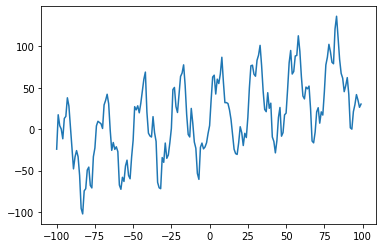

In [40]:
plt.plot(x,y)

In [46]:
m1 = LinearRegression()

In [56]:
m1.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [60]:
m1.predict(np.array([[0], [-100], [10000]]))

array([  15.13857903,  -30.35627689, 4564.62417145])

In [62]:
m1.coef_

array([0.45494856])

In [64]:
yh = m1.predict(X)

In [65]:
explained_variance_score(y, yh)

0.31942608328120703

In [66]:
y2 = 0.5*x + 2*np.sin(x) + 5*np.sin(x/4) + 3*r

In [67]:
m2 = LinearRegression()
m2.fit(X, y2)
print(m2.coef_)
yh2 = m2.predict(X)

[0.49549486]


In [68]:
explained_variance_score(y2, yh2)

0.9823550794532203

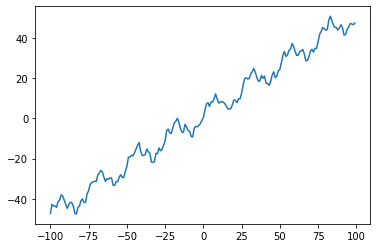

In [69]:
plt.plot(x,y2)

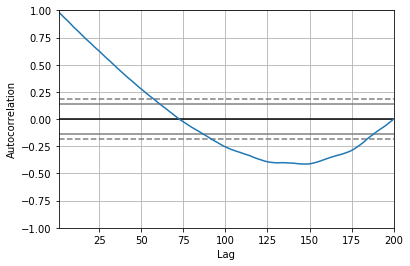

In [72]:
autocorrelation_plot(y2)

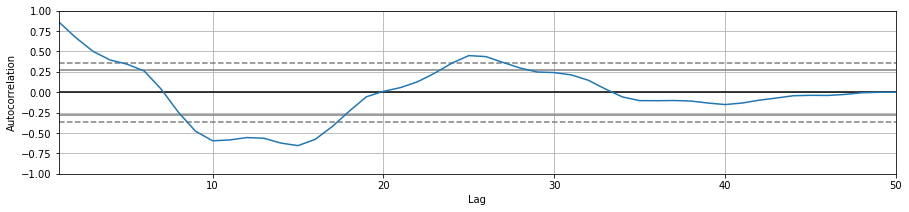

In [79]:
plt.figure(figsize=(15,3))
autocorrelation_plot(y[0:50])

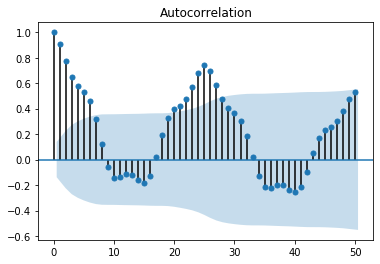

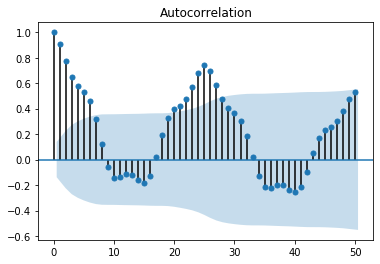

In [85]:
plot_acf(y, lags=50)

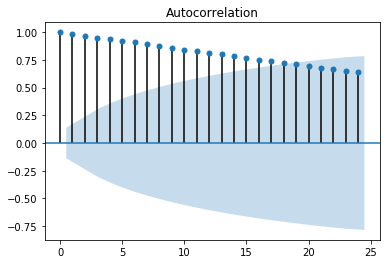

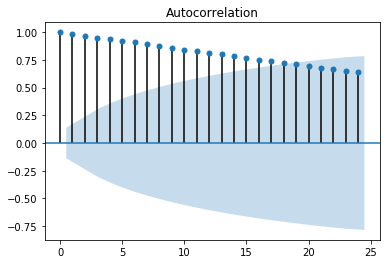

In [84]:
plot_acf(y2)

In [80]:
y_mt = y - yh

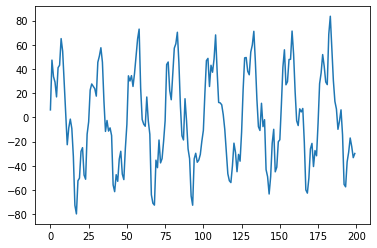

In [81]:
plt.plot(y_mt)

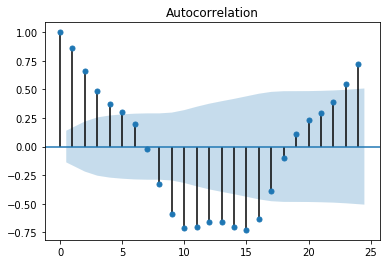

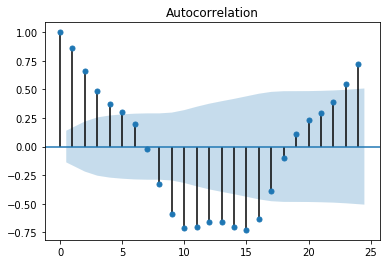

In [82]:
plot_acf(y_mt)

/Users/nishant.deshpande/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


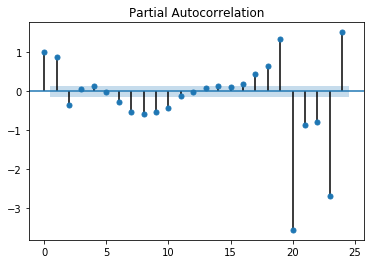

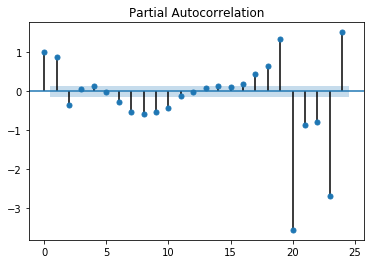

In [91]:
plot_pacf(y_mt)

In [83]:
m3 = LinearRegression()
m3.fit(X, y_mt)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [87]:
m3.coef_

array([-1.17471665e-16])

In [88]:
y_mt_h = m3.predict(X)

In [89]:
explained_variance_score(y_mt, y_mt_h)

0.0

In [106]:
[e for e in range(1,30)]

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [118]:
am1 = AutoReg(y_mt, lags=[20,21,22,23,24,25]).fit()

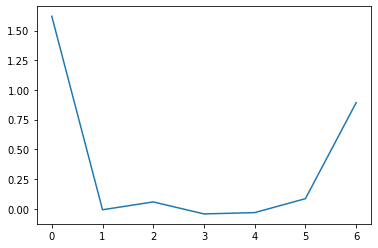

In [119]:
plt.plot(am1.params)

In [121]:
y_mt_ar_h = am1.predict()

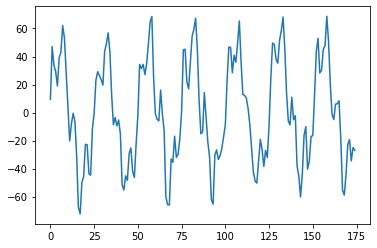

In [123]:
plt.plot(y_mt_ar_h)

In [131]:
am2 = AutoReg(y_mt, lags=[19,20,21,22]).fit()

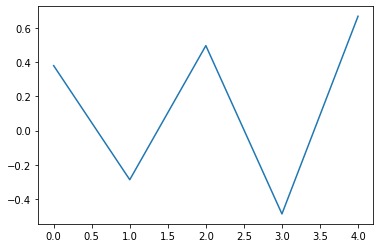

In [132]:
plt.plot(am2.params)

In [136]:
am2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                  200
Model:             Restr. AutoReg(22)   Log Likelihood                -877.257
Method:               Conditional MLE   S.D. of innovations             33.431
Date:                Mon, 03 Aug 2020   AIC                              7.086
Time:                        12:22:16   BIC                              7.194
Sample:                            22   HQIC                             7.130
                                  200                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3796      2.506      0.151      0.880      -4.533       5.292
y.L19         -0.2879      0.141     -2.045      0.041      -0.564      -0.012
y.L20          0.4969      0.217      2.292      0.022       0.072       0.922
y.L21         -0.4879      0.214     -2.277      0.023      -0.908      -0.068
y.L22          0.6688      0.139      4.806      0.000       0.396       0.942
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -0.9686           -0.0000j            0.9686           -0.5000
AR.2            -0.9270           -0.2894j            0.9711           -0.4518
AR.3            -0.9270           +0.2894j            0.9711            0.4518
AR.4            -0.8055           -0.5563j            0.9790           -0.4038
AR.5            -0.8055           +0.5563j            0.9790            0.4038
AR.6            -0.6144           -0.7806j            0.9934           -0.3561
AR.7            -0.6144           +0.7806j            0.9934            0.3561
AR.8            -0.3706           -0.9465j            1.0165           -0.3094
AR.9            -0.3706           +0.9465j            1.0165            0.3094
AR.10           -0.1014           -1.0416j            1.0465           -0.2654
AR.11           -0.1014           +1.0416j            1.0465            0.2654
AR.12            1.0421           -0.0000j            1.0421           -0.0000
AR.13            0.9980           -0.2845j            1.0378           -0.0442
AR.14            0.9980           +0.2845j            1.0378            0.0442
AR.15            0.8720           -0.5504j            1.0312           -0.0896
AR.16            0.8720           +0.5504j            1.0312            0.0896
AR.17            0.6775           -0.7766j            1.0306           -0.1358
AR.18            0.6775           +0.7766j            1.0306            0.1358
AR.19            0.1664           -1.0428j            1.0560           -0.2248
AR.20            0.1664           +1.0428j            1.0560            0.2248
AR.21            0.4329           -0.9460j            1.0403           -0.1817
AR.22            0.4329           +0.9460j            1.0403            0.1817
------------------------------------------------------------------------------
"""

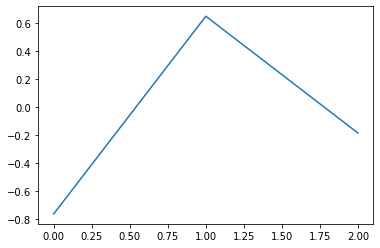

In [134]:
am3 = AutoReg(y_mt, lags=[3,4]).fit()
plt.plot(am3.params)

In [137]:
am3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                  200
Model:              Restr. AutoReg(4)   Log Likelihood                -965.611
Method:               Conditional MLE   S.D. of innovations             33.370
Date:                Mon, 03 Aug 2020   AIC                              7.056
Time:                        12:23:18   BIC                              7.123
Sample:                             4   HQIC                             7.083
                                  200                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.7624      2.384     -0.320      0.749      -5.435       3.910
y.L3           0.6473      0.124      5.224      0.000       0.404       0.890
y.L4          -0.1859      0.124     -1.499      0.134      -0.429       0.057
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.6099           -0.8996j            1.0869           -0.3448
AR.2           -0.6099           +0.8996j            1.0869            0.3448
AR.3            1.3644           -0.0000j            1.3644           -0.0000
AR.4            3.3378           -0.0000j            3.3378           -0.0000
-----------------------------------------------------------------------------
"""

In [138]:
y_mt_ar_h3 = am3.predict()

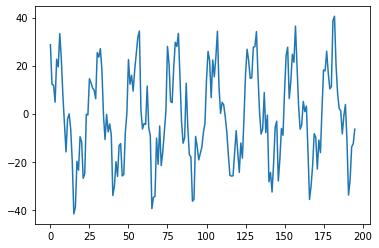

In [139]:
plt.plot(y_mt_ar_h3)